In [111]:
import pandas as pd                  # dataframe library
import matplotlib.pyplot as plt      # plot data
import numpy as np                   # N-dim object support
import seaborn as sns
import calendar

# do ploting inline
%matplotlib inline

In [112]:
df = pd.read_csv('BTCUSDT.csv',names=['Date','Time','Open','High','Low','Close','Volume','TickVolume','Spread'])

In [113]:
df.head(3)

,Date,Time,Open,High,Low,Close,Volume,TickVolume,Spread
0,2017.08.17,04:00:00,4261.48,4261.48,4261.48,4261.48,100,100,1
1,2017.08.17,04:01:00,4261.48,4261.48,4261.48,4261.48,1,1,1
2,2017.08.17,04:02:00,4280.56,4280.56,4280.56,4280.56,38,38,1


In [114]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df[['Date', 'Time', 'DateTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'TickVolume','Spread']]
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(int)
df['TickVolume'] = df['TickVolume'].astype(int)
df['Spread'] = df['Spread'].astype(int)

In [115]:
#Remove 2017 because it has only 2 months. 
df = df[(df['DateTime']>pd.Timestamp(2018,1,1))]
df.head(3)

,Date,Time,DateTime,Open,High,Low,Close,Volume,TickVolume,Spread
196741,2018.01.01,00:01:00,2018-01-01 00:01:00,13707.91,13707.91,13666.11,13694.92,41,41,1
196742,2018.01.01,00:02:00,2018-01-01 00:02:00,13682.00,13694.94,13680.00,13680.00,34,34,1
196743,2018.01.01,00:03:00,2018-01-01 00:03:00,13679.98,13679.98,13601.00,13645.99,86,86,1


In [116]:
df.tail(3)

,Date,Time,DateTime,Open,High,Low,Close,Volume,TickVolume,Spread
2137234,2021.09.13,16:07:00,2021-09-13 16:07:00,44374.41,44374.41,44323.01,44351.37,831,831,1
2137235,2021.09.13,16:08:00,2021-09-13 16:08:00,44351.37,44400.05,44343.88,44360.69,1072,1072,1
2137236,2021.09.13,16:09:00,2021-09-13 16:09:00,44360.69,44374.92,44347.26,44347.27,583,583,1


## Hour

In [117]:
d = {'Open':'first', 'High':'max','Low':'min','Close':'last','Volume':'sum'}
df_hour = df.resample('1H', on='DateTime').agg(d)
df_hour.head(3)

,Open,High,Low,Close,Volume
DateTime,,,,,
2018-01-01 00:00:00,13707.91,13707.91,13400.01,13529.01,2842
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,2873
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,2859


In [118]:
# calculate move percent
df_hour['Hour'] = df_hour.index.hour
df_hour['MovePercent'] = ((df_hour['High'] - df_hour['Low'])/df_hour['Open']) * 100.0
df_hour.head(3)

,Open,High,Low,Close,Volume,Hour,MovePercent
DateTime,,,,,,,
2018-01-01 00:00:00,13707.91,13707.91,13400.01,13529.01,2842,0,2.246148
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,2873,1,3.256045
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,2859,2,1.654397


In [119]:
df_group=df_hour.groupby('Hour').mean()
df_group.head(3)

,Open,High,Low,Close,Volume,MovePercent
Hour,,,,,,
0,15447.948660,15566.287787,15322.619289,15450.331184,36528.203402,1.347805
1,15462.678377,15558.277910,15365.626175,15469.014285,30899.457840,1.097858
2,15439.642388,15517.082904,15341.345329,15425.377118,27880.481509,1.023742


<AxesSubplot:xlabel='Hour', ylabel='MovePercent'>

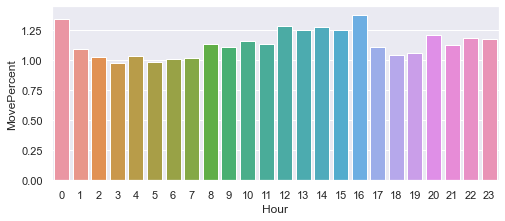

In [120]:
sns.set(rc={'figure.figsize':(8,3.2)})
sns.barplot(x=df_group.index, y=df_group['MovePercent'])

## Day

In [121]:
d = {'Open':'first', 'High':'max','Low':'min','Close':'last','Volume':'sum'}
df_day = df.resample('1D', on='DateTime').agg(d)
df_day.head(3)

,Open,High,Low,Close,Volume
DateTime,,,,,
2018-01-01,13707.91,13818.55,12750.00,13380.00,68416
2018-01-02,13382.16,15473.49,12890.02,14675.11,70665
2018-01-03,14690.00,15307.56,14150.00,14919.51,69807


In [122]:
# calculate move percent
df_day['DayNumber'] = df_day.index.dayofweek
df_day['MovePercent'] = ((df_day['High'] - df_day['Low'])/df_day['Open']) * 100.0
df_day.head(3)

,Open,High,Low,Close,Volume,DayNumber,MovePercent
DateTime,,,,,,,
2018-01-01,13707.91,13818.55,12750.00,13380.00,68416,0,7.795134
2018-01-02,13382.16,15473.49,12890.02,14675.11,70665,1,19.305329
2018-01-03,14690.00,15307.56,14150.00,14919.51,69807,2,7.879918


In [123]:
df_group2=df_day.groupby('DayNumber').mean().sort_values(by=['DayNumber'], ascending=True)
df_group2['Day'] = ''
for index in range (0,df_group2.shape[0]):
    df_group2.at[index,'Day'] = calendar.day_name[df_group2.index[index]]
df_group2.head(3)

,Open,High,Low,Close,Volume,MovePercent,Day
DayNumber,,,,,,,
0,15509.496649,16053.895773,14898.895155,15542.436598,868614.247423,6.520773,Monday
1,15393.074819,15812.132642,14802.527358,15351.949119,822456.347150,5.879452,Tuesday
2,15352.110570,15902.245337,14789.446736,15415.803109,871835.393782,6.237662,Wednesday


<AxesSubplot:xlabel='Day', ylabel='MovePercent'>

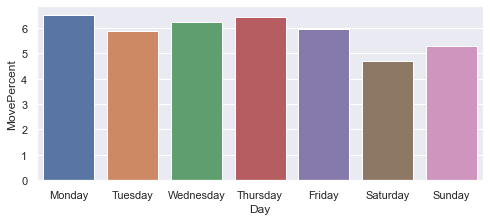

In [124]:
sns.set(rc={'figure.figsize':(8,3.2)})
sns.barplot(x=df_group2['Day'], y=df_group2['MovePercent'])

## Month

In [125]:
d = {'Open':'first', 'High':'max','Low':'min','Close':'last','Volume':'sum'}
df_month = df.resample('1MS', on='DateTime').agg(d)
df_month.head(3)

,Open,High,Low,Close,Volume
DateTime,,,,,
2018-01-01,13707.91,17176.24,9035.00,10285.10,2158823
2018-02-01,10285.10,11786.01,6000.01,10326.76,1852686
2018-03-01,10325.64,11710.00,6600.10,6923.91,2132309


In [126]:
# calculate move percent
df_month['MonthNumber'] = df_month.index.month
df_month['MovePercent'] = ((df_month['High'] - df_month['Low'])/df_month['Open']) * 100.0
df_month.head(3)

,Open,High,Low,Close,Volume,MonthNumber,MovePercent
DateTime,,,,,,,
2018-01-01,13707.91,17176.24,9035.00,10285.10,2158823,1,59.390819
2018-02-01,10285.10,11786.01,6000.01,10326.76,1852686,2,56.256138
2018-03-01,10325.64,11710.00,6600.10,6923.91,2132309,3,49.487489


In [127]:
df_group3=df_month.groupby('MonthNumber').mean().sort_values(by=['MonthNumber'], ascending=True)
df_group3['Month'] = ''
for index in range (0,df_group3.shape[0]):
    df_group3.at[df_group3.index[index],'Month'] = calendar.month_name[df_group3.index[index]][:3]
df_group3.head(3)

,Open,High,Low,Close,Volume,MovePercent,Month
MonthNumber,,,,,,,
1,13382.0025,18193.5100,11846.4900,14041.2675,31335902.75,41.060777,Jan
2,14040.9700,21209.2025,12528.5675,16949.9300,30482564.00,45.247317,Feb
3,16949.4050,21720.5000,14750.8625,19044.7125,30212995.50,40.660845,Mar


<AxesSubplot:xlabel='Month', ylabel='MovePercent'>

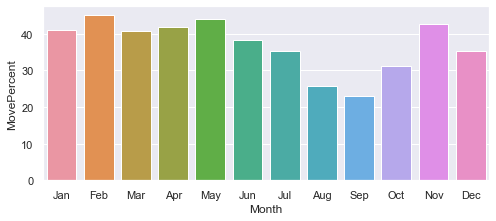

In [128]:
sns.set(rc={'figure.figsize':(8,3.2)})
sns.barplot(x=df_group3['Month'], y=df_group3['MovePercent'])

## Months with diffrent bar for every year

In [129]:
df_month['Year'] = df_month.index.year
df_month.head(3)

,Open,High,Low,Close,Volume,MonthNumber,MovePercent,Year
DateTime,,,,,,,,
2018-01-01,13707.91,17176.24,9035.00,10285.10,2158823,1,59.390819,2018
2018-02-01,10285.10,11786.01,6000.01,10326.76,1852686,2,56.256138,2018
2018-03-01,10325.64,11710.00,6600.10,6923.91,2132309,3,49.487489,2018


In [130]:
df_group4=df_month.groupby(['Year','MonthNumber']).mean().sort_values(by=['Year','MonthNumber'], ascending=True)
df_group4 = df_group4.reset_index()
df_group4.head(3)

,Year,MonthNumber,Open,High,Low,Close,Volume,MovePercent
0,2018,1,13707.91,17176.24,9035.00,10285.10,2158823,59.390819
1,2018,2,10285.10,11786.01,6000.01,10326.76,1852686,56.256138
2,2018,3,10325.64,11710.00,6600.10,6923.91,2132309,49.487489


<AxesSubplot:xlabel='MonthNumber', ylabel='MovePercent'>

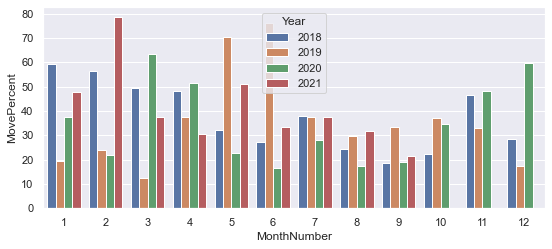

In [131]:
sns.set(rc={'figure.figsize':(9.0,3.7)})
sns.barplot(x=df_group4['MonthNumber'], y=df_group4['MovePercent'],hue=df_group4['Year'])